In [1]:
# IMPORT ALL DEPENDENCIES

import os
import cv2
from matplotlib import pyplot as plt
import xml.etree.ElementTree as ET
from PIL import Image
import numpy as np
import math
from scipy.spatial import distance as distance_module
from scipy.spatial.distance import cityblock


In [2]:
# DECLARING ALL PATHS AND VARIABLES.

DATA_DIR = "\\".join(os.getcwd().split("\\")[:-1]) + "\\" + "DataSet"
ANNOTATIONS_DIR = DATA_DIR + "\\" + "Annotations\\"
IMG_DIR = DATA_DIR + "\\" + "Images\\"
PROCESSESED_PATH = DATA_DIR + '\\' + 'ProcessedDatasets\\'
AVAILABLE_CLASSES = ['n02089078-black-and-tan_coonhound','n02091831-Saluki'
                     ,'n02092002-Scottish_deerhound',
                     'n02095314-wire-haired_fox_terrier']


CLASS_NAMES = []
CLASS_CODES = []
ANNOTATION_PATHS = []
IMAGE_PATHS = []
PROCESSED_IMAGE_PATHS = []


for i in range(4):
    CLASS_NAMES.append("-".join(AVAILABLE_CLASSES[i].split("-")[1:]))
    CLASS_CODES.append(AVAILABLE_CLASSES[i].split("-")[0])
    ANNOTATION_PATHS.append(ANNOTATIONS_DIR + AVAILABLE_CLASSES[i] + "\\" )
    IMAGE_PATHS.append(IMG_DIR + AVAILABLE_CLASSES[i] + "\\")
    PROCESSED_IMAGE_PATHS.append(PROCESSESED_PATH + CLASS_CODES[i]+"-" +CLASS_NAMES[i]+ "\\")



In [3]:
# FUNCTION TO PROCESS THE IMAGE BASED ON THE CORRESPONDING ANNOTATIONS.

def get_bounding_boxes(annot):
  xml = annot
  tree = ET.parse(xml)
  root = tree.getroot()
  objects = root.findall('object')
  bbox = []
  for o in objects:
    bndbox = o.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    bbox.append((xmin,ymin,xmax,ymax))
  return bbox

#FUNCTION TO CROP EVERY IMAGE IN EVERY CLASS AND SAVE IN A PROCESSED DIRECTORY.

def crop_image(image_path , annotation_path,save_path):
  img = cv2.imread(image_path,cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  bb = get_bounding_boxes(annotation_path)
  bbox = bb[0]
  cropped_data = img[bbox[1]:bbox[3], bbox[0]:bbox[2]]    # cropping the image
  cropped_data = cv2.resize(cropped_data,dsize=(331 ,331)) # rescaling it to a square image
  crop_img = Image.fromarray(cropped_data,'RGB')  # converting the numpy array to an image
  crop_img.save(save_path)
  


  

In [4]:


for i in range(4):
    for dog in os.listdir(IMAGE_PATHS[i]):
        image_path = dog
        annotation_path = dog.split(".")[0]
        if not os.path.exists(PROCESSED_IMAGE_PATHS[i]):
            os.mkdir(PROCESSED_IMAGE_PATHS[i])
        crop_image(IMAGE_PATHS[i]+  image_path, ANNOTATION_PATHS[i] 
                   + annotation_path, PROCESSED_IMAGE_PATHS[i] + dog)



<h1>(b)Plotting Grayscaled images and their corresponding intensity equalized histogram</h1>

(i & ii) plotting grayscaled images and pixel intensity histograms.

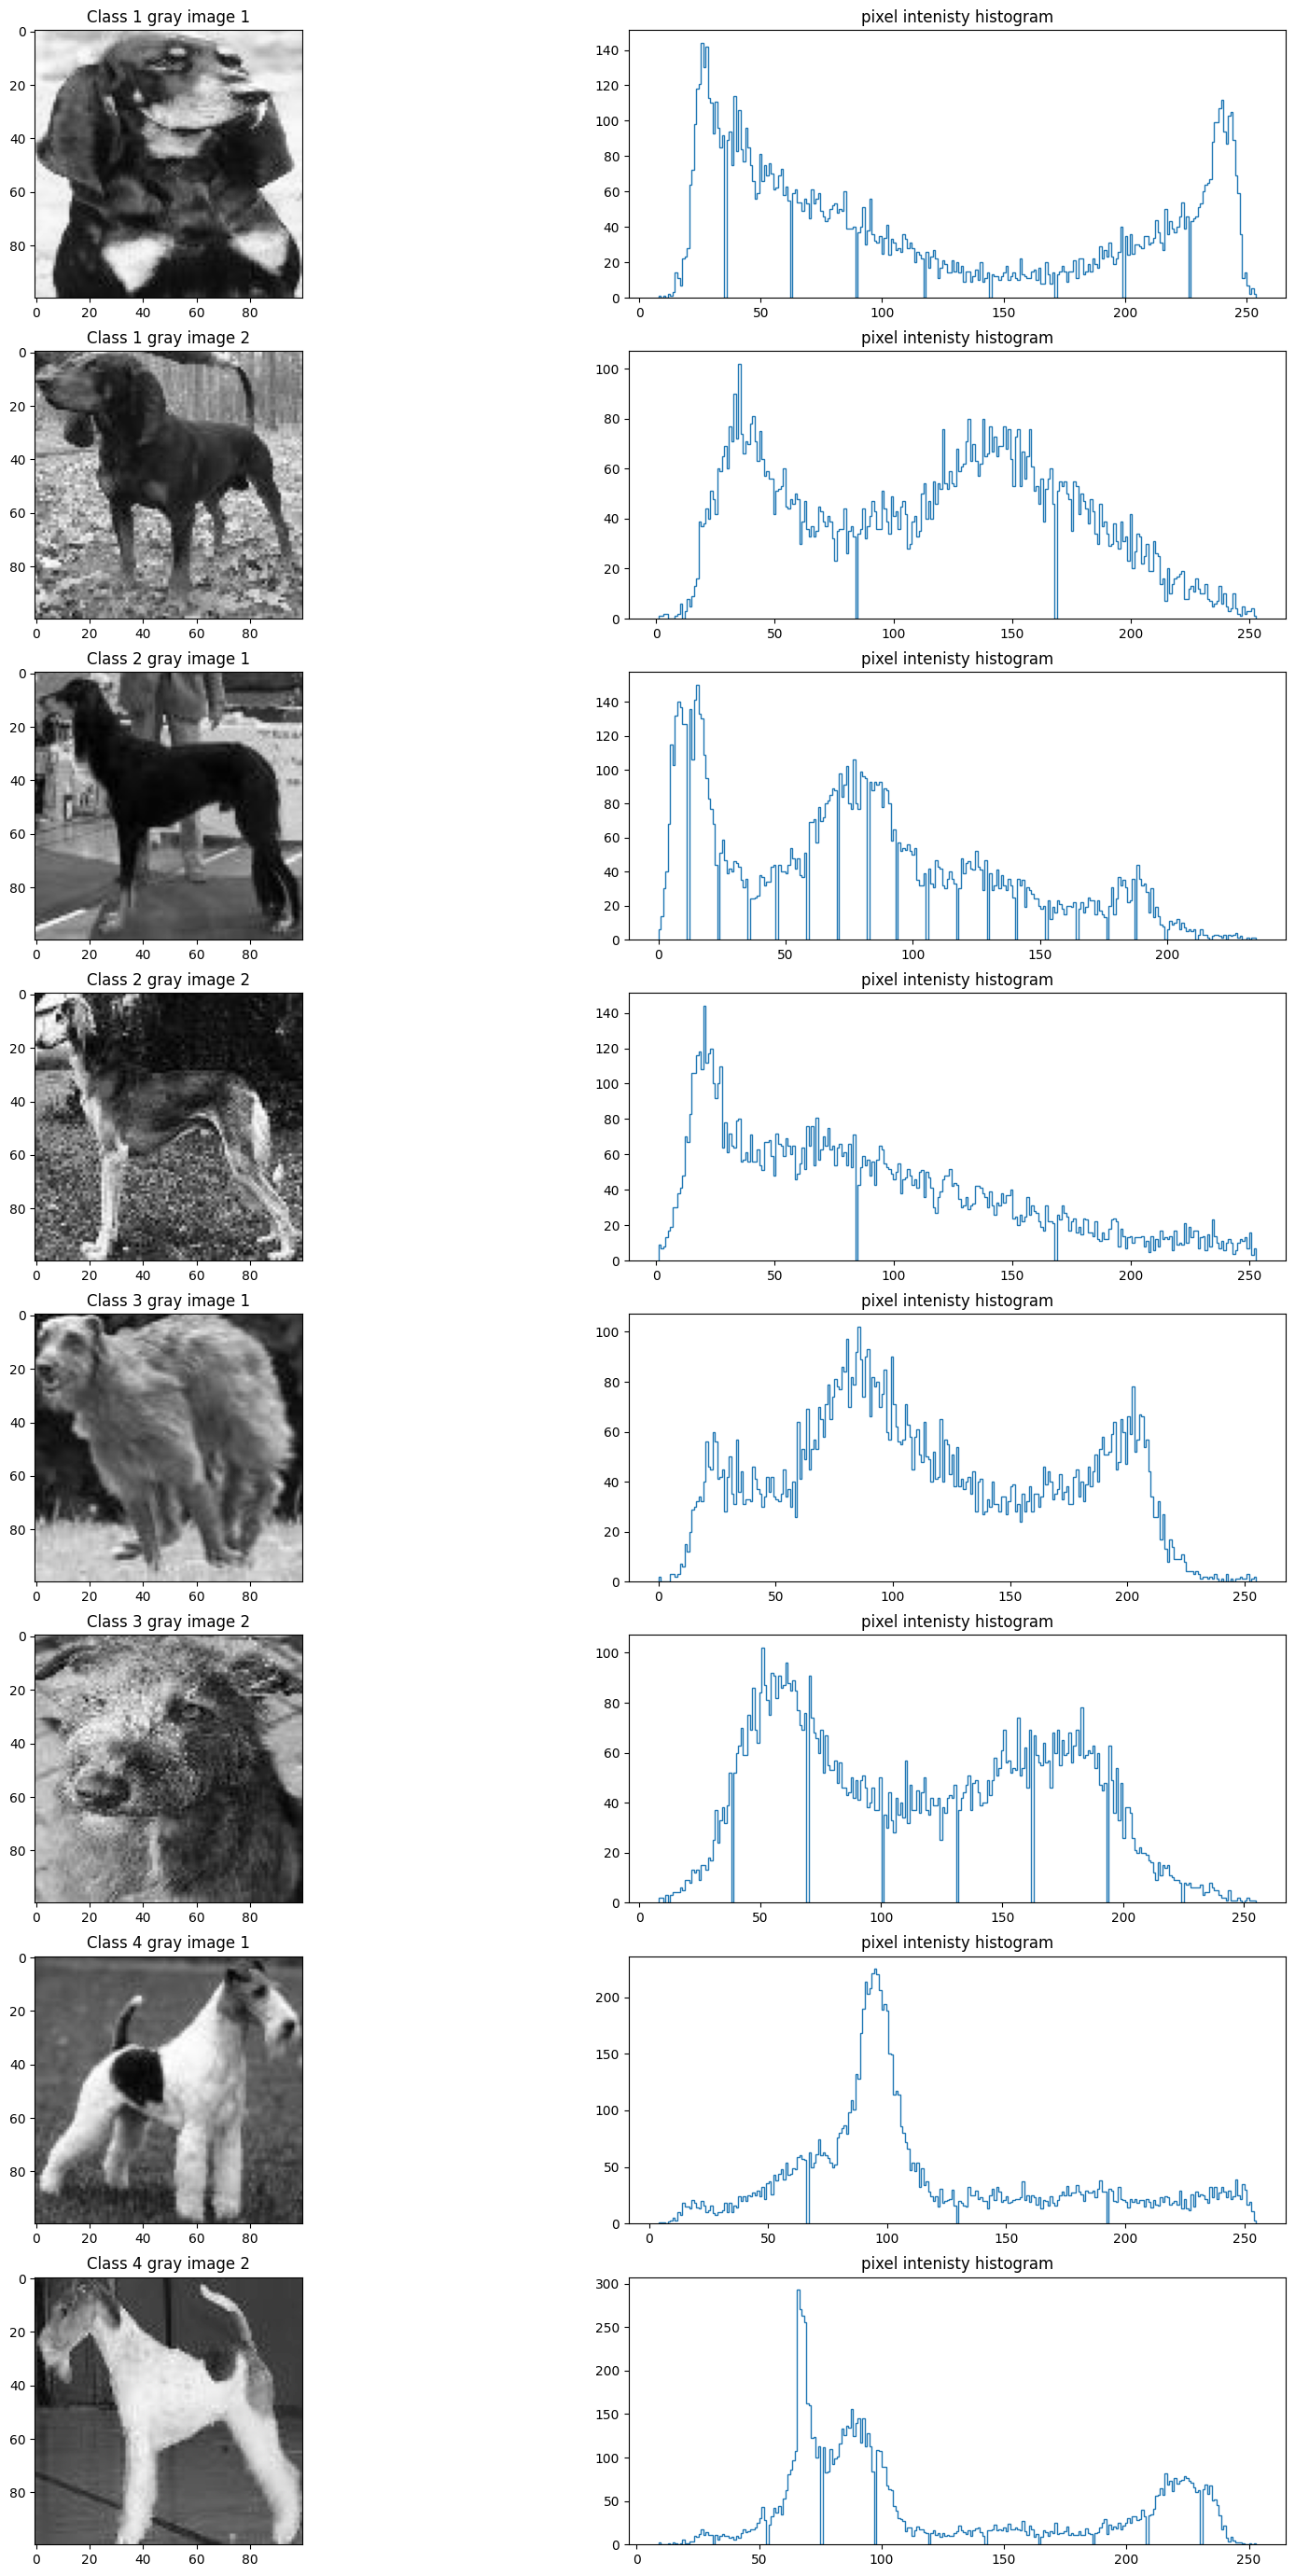

In [5]:
fig = plt.figure(figsize=(20, 35))
rows = 8
columns = 2

for i in range(4):
    img1 = cv2.imread(PROCESSED_IMAGE_PATHS[i] 
                      +  os.listdir(PROCESSED_IMAGE_PATHS[i])[1],cv2.IMREAD_COLOR )
    img2 = cv2.imread(PROCESSED_IMAGE_PATHS[i] 
                      +  os.listdir(PROCESSED_IMAGE_PATHS[i])[2],cv2.IMREAD_COLOR )
    img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
    arr_1 =img1_gray.flatten()
    arr_2 =img2_gray.flatten()

    fig.add_subplot(rows,columns,4*i+1)
    plt.imshow(img1_gray,cmap='gray')
    plt.title("Class "+str(i+1)+" gray image 1")


    fig.add_subplot(rows,columns,2*(2*i+1))
    plt.hist(arr_1,bins=255,histtype='step')
    plt.title("pixel intenisty histogram")

    fig.add_subplot(rows,columns,4*i+3)
    plt.imshow(img2_gray,cmap='gray')
    plt.title("Class "+str(i+1)+" gray image 2")

    fig.add_subplot(rows,columns,2*(2*i+2))
    plt.hist(arr_2,bins=255,histtype='step')
    plt.title("pixel intenisty histogram")


(iii) plotting intensity equalized grayscale images and corresponding pixel intensity histograms.

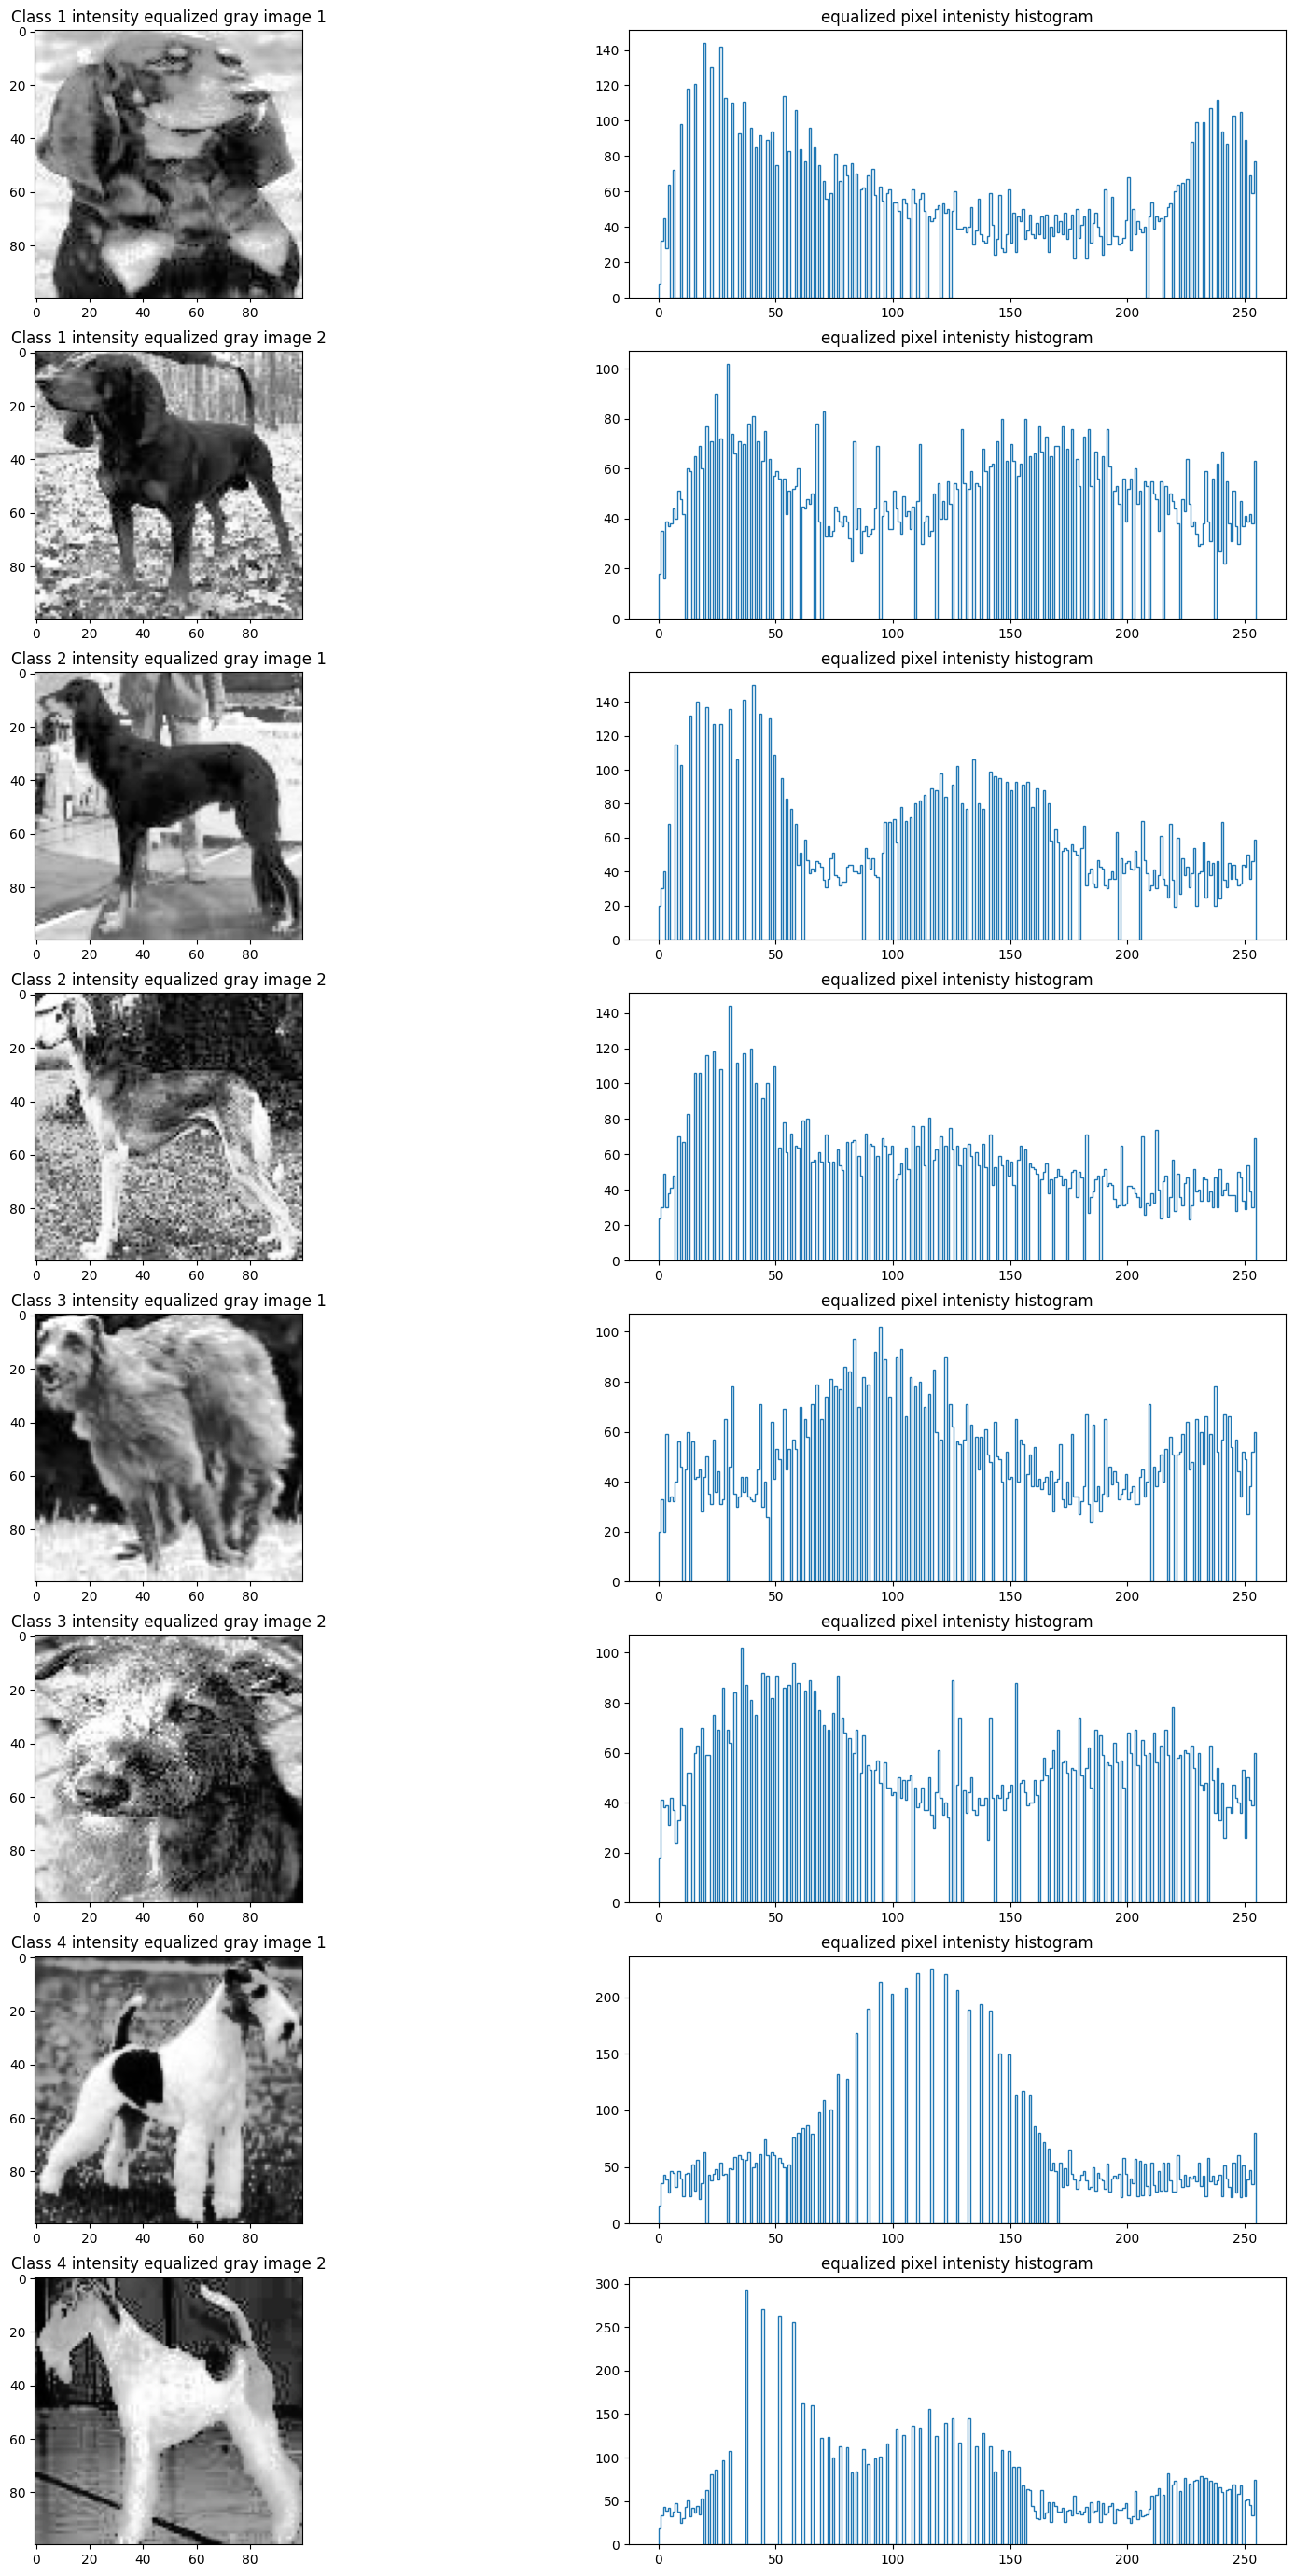

In [6]:
fig = plt.figure(figsize=(20, 35))

rows = 8
columns = 2


for i in range(4):

    img1 = cv2.imread(PROCESSED_IMAGE_PATHS[i] 
                      +  os.listdir(PROCESSED_IMAGE_PATHS[i])[1] )
    img2 = cv2.imread(PROCESSED_IMAGE_PATHS[i] 
                      +  os.listdir(PROCESSED_IMAGE_PATHS[i])[2] )
    img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
    img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)


    img1_eq = cv2.equalizeHist(img1_gray)
    img2_eq = cv2.equalizeHist(img2_gray)
    arr_1_eq =img1_eq.flatten()
    arr_2_eq =img2_eq.flatten()

    fig.add_subplot(rows,columns,4*i+1)
    plt.imshow(img1_eq,cmap='gray')
    plt.title("Class "+str(i+1)+" intensity equalized gray image 1")

    fig.add_subplot(rows,columns,2*(2*i+1))
    plt.hist(arr_1_eq,bins=255,histtype='step')
    plt.title("equalized pixel intenisty histogram")

    fig.add_subplot(rows,columns,4*i+3)
    plt.imshow(img2_eq,cmap='gray')
    plt.title("Class "+str(i+1)+" intensity equalized gray image 2")

    fig.add_subplot(rows,columns,4*(i+1))
    plt.hist(arr_2_eq,bins=255,histtype='step')
    plt.title("equalized pixel intenisty histogram")

(iv)Comapring gray scaled image and intensity equalized image.


Text(0.5, 1.0, 'Grayscale intensity equalized image')

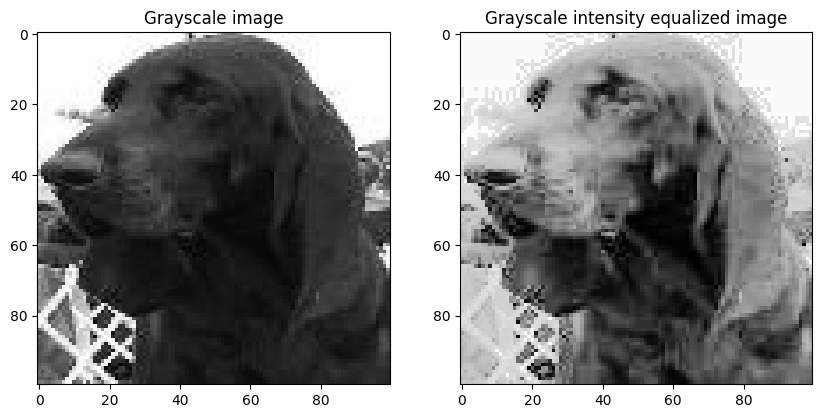

In [7]:
fig = plt.figure(figsize=(10,5))
rows = 1
cols = 2

img = cv2.imread(PROCESSED_IMAGE_PATHS[0] 
                      +  os.listdir(PROCESSED_IMAGE_PATHS[0])[9])

img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_eq = cv2.equalizeHist(img_gray)

fig.add_subplot(rows,cols,1)
plt.imshow(img_gray,cmap='gray')
plt.title("Grayscale image")

fig.add_subplot(rows,cols,2)
plt.imshow(img_eq,cmap='gray')
plt.title("Grayscale intensity equalized image")


    Observation:
    The intensity equalized image is a bit brighter than the gray scale image. The contrast is much increased and the features are more clearer than the gray scaled image. The equalized and the normal grayscaled image both have the same histogram shape however the equalised histogram has much wider peaks as the values are equalized.

<h1>(c) RGB Histogram</h1>

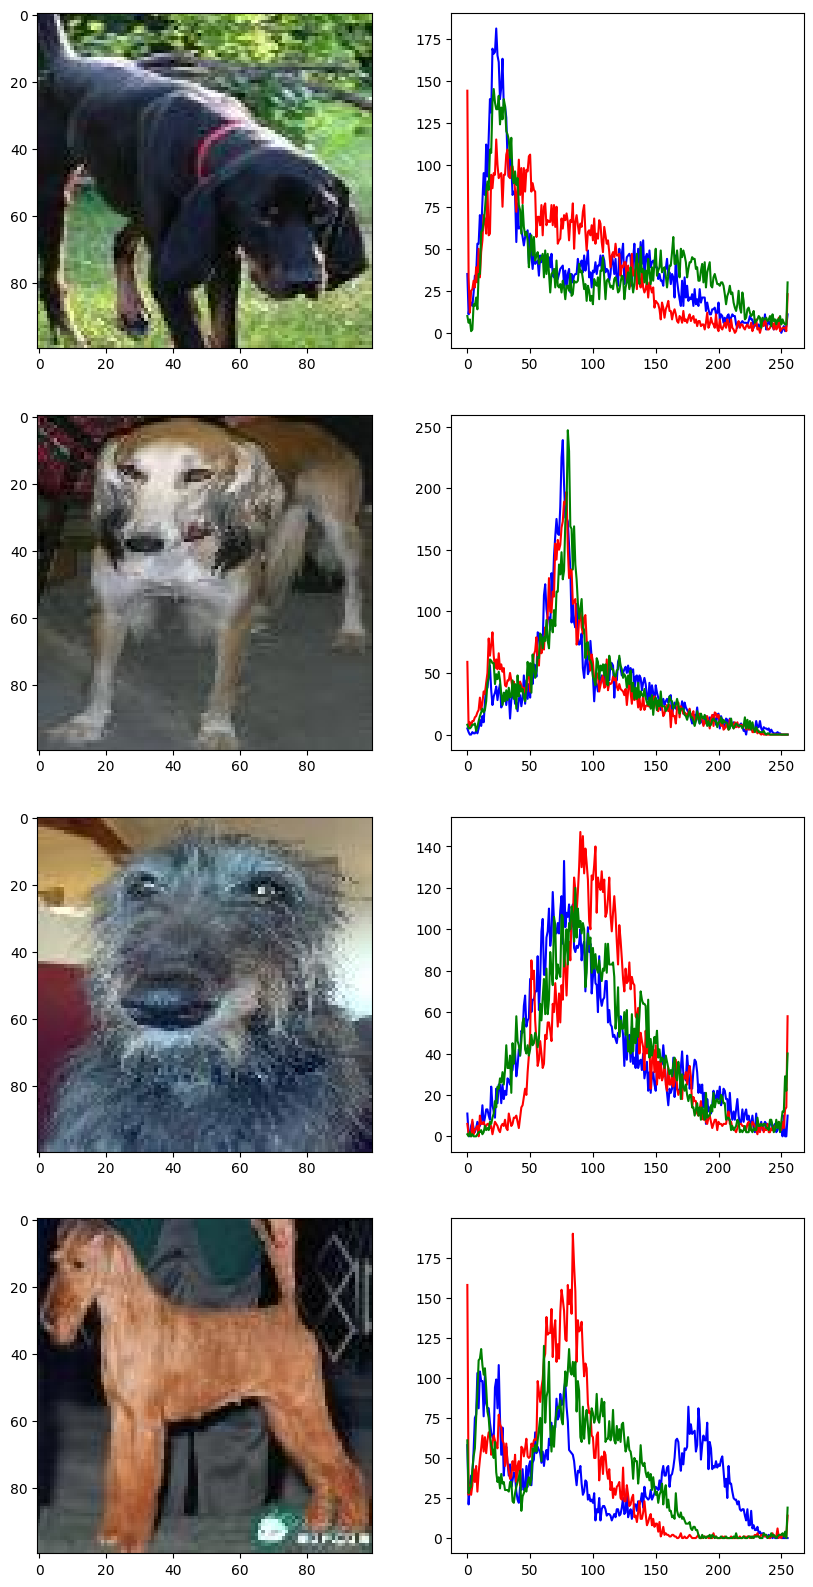

In [8]:
fig = plt.figure(figsize=(10, 20))

rows = 4
columns = 2


for i in range(4):

    img = cv2.imread(PROCESSED_IMAGE_PATHS[i] +  os.listdir(PROCESSED_IMAGE_PATHS[i])[7] ,cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows,columns,2*(i)+1)
    plt.imshow(img)
    img_hist_blue = cv2.calcHist([img],[0],None,[256],[0,256])
    img_hist_red = cv2.calcHist([img],[2],None,[256],[0,256])
    img_hist_green = cv2.calcHist([img],[1],None,[256],[0,256])
    
    
    fig.add_subplot(rows,columns,2*(i+1))
    plt.plot(img_hist_blue,color='blue')
    plt.plot(img_hist_red,color='red')
    plt.plot(img_hist_green,color='green')


<h1>(d)Histogram Comparison</h1>

(i) picking 3 images 2 from same class and 1 from a different class

In [9]:
class_1 = 1
class_2 = 3
img1 = 4
img2= 7
img3 = 10


img1_class_1 = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] 
                          +  os.listdir(PROCESSED_IMAGE_PATHS[class_1])[img1] )
img2_class_1 = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] 
                          +  os.listdir(PROCESSED_IMAGE_PATHS[class_1])[img2] )
img3_class_2 = cv2.imread(PROCESSED_IMAGE_PATHS[class_2] 
                          +  os.listdir(PROCESSED_IMAGE_PATHS[class_2])[img3] )



(ii) converting to grayscale pixel intensity histograms.

In [10]:

img1_gray_class_1 = cv2.cvtColor(img1_class_1,cv2.COLOR_BGR2GRAY)
img2_gray_class_1 = cv2.cvtColor(img2_class_1,cv2.COLOR_BGR2GRAY)
img3_gray_class_2 = cv2.cvtColor(img3_class_2,cv2.COLOR_BGR2GRAY)

hist1 = cv2.calcHist([img1_gray_class_1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2_gray_class_1], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3_gray_class_2], [0], None, [256], [0, 256])


arr1= []
for i in hist1:
    arr1.append(i[0])

arr2= []
for i in hist2:
    arr2.append(i[0])

arr3= []
for i in hist3:
    arr3.append(i[0])



(iii) Histogram comparision using different metrics.

euclidean distance of same class images: 793.4015502929688
euclidean distance of different class images: 1224.6591796875
manhattan distance of same class images: 8490.0
manhattan distance of different class images: 9736.0
bhattacharya distance of same class images: 0.43279012381645643
bhattacharya distance of different class images: 0.4699503254373517
Histogram Intersection of same class images: 5755.0
Histogram Intersection of different class images: 5132.0


Text(0.5, 1.0, 'histogram intersection of different class images')

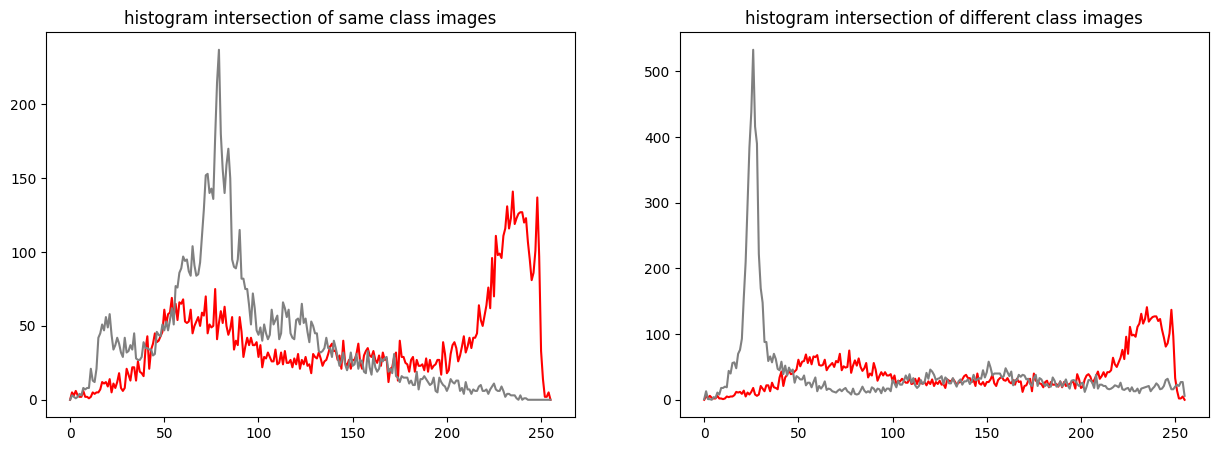

In [11]:
# Euclidean Distance
print('euclidean distance of same class images:',distance_module.euclidean(arr1, arr2))
print('euclidean distance of different class images:',distance_module.euclidean(arr1, arr3))


print('manhattan distance of same class images:',cityblock(arr1,arr2))
print('manhattan distance of different class images:',cityblock(arr1,arr3))


print('bhattacharya distance of same class images:',cv2.compareHist(hist1,hist2,cv2.HISTCMP_BHATTACHARYYA))
print('bhattacharya distance of different class images:',cv2.compareHist(hist1,hist3,cv2.HISTCMP_BHATTACHARYYA))

fig = plt.figure(figsize=(15, 5))

rows = 1
columns = 2
print('Histogram Intersection of same class images:',cv2.compareHist(hist1,hist2,cv2.HISTCMP_INTERSECT))
print('Histogram Intersection of different class images:',cv2.compareHist(hist1,hist3,cv2.HISTCMP_INTERSECT))

fig.add_subplot(rows,columns,1)
plt.plot(hist1,color = 'red')
plt.plot(hist2,color = 'grey')
plt.title('histogram intersection of same class images')

fig.add_subplot(rows,columns,2)
plt.plot(hist1,color = 'red')
plt.plot(hist3,color = 'grey')
plt.title('histogram intersection of different class images')

observation:

The distances are higher in case of two images from different classes regardless the metric used, Except the histogram intersect metric as this metric shows how much similarity is between the two histograms Hence this metric will be much higher for same class objects.

<h1>(e) Image Feature Descriptor: ORB (Oriented FAST and Rotated BRIEF) </h1>

Question: 
edge threshold used is 25,
patch size used is 20 and 
keypoints extracted are 55

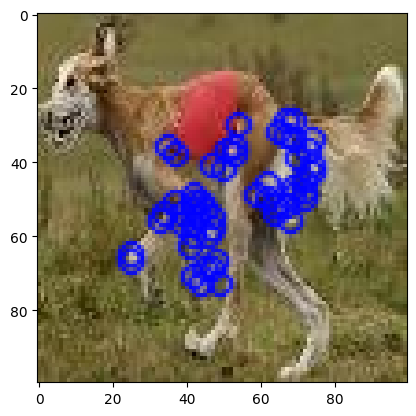

(<matplotlib.image.AxesImage at 0x237f815a230>, None)

In [12]:
edge_threshold = 25
patch_size = 20
keypoints = 55

img = cv2.imread(PROCESSED_IMAGE_PATHS[class_1] +  
                 os.listdir(PROCESSED_IMAGE_PATHS[class_1])[88] ,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create(edgeThreshold= edge_threshold,
                     patchSize=patch_size, nlevels=1, 
                     fastThreshold=20,scaleFactor=2, 
                     WTA_K=4,scoreType=cv2.ORB_HARRIS_SCORE
                     ,firstLevel=0, nfeatures=keypoints)

kp = orb.detect(img,None)

kp, des = orb.compute(img, kp)

img2 = cv2.drawKeypoints(img, kp, None, color=(0,0,255), flags=0)
plt.imshow(img2), plt.show()


<h1>(f) PCA dimensionality reduction</h1>

In [13]:
dataset = []


# Reading all the images into a single dataset.

for dog in os.listdir(PROCESSED_IMAGE_PATHS[1]):
    img1_eq = cv2.imread(PROCESSED_IMAGE_PATHS[1] + dog,cv2.IMREAD_GRAYSCALE)
    hist1 = cv2.calcHist([img1_eq], [0], None, [256], [0, 256])
    dataset.append(hist1)

c1 = len(dataset) # number of images in first class

for dog in os.listdir(PROCESSED_IMAGE_PATHS[3]):
    img2_eq = cv2.imread(PROCESSED_IMAGE_PATHS[3] + dog,cv2.IMREAD_GRAYSCALE)
    hist2 = cv2.calcHist([img2_eq], [0], None, [256], [0, 256])
        
    dataset.append(hist2)

dataset = np.array(dataset)[:,:,0]

final_dataset = dataset


In [14]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# normalizing the dataset
data = StandardScaler().fit_transform(final_dataset) 

pca= PCA(n_components=2)
principalComponents_dog = pca.fit_transform(data)


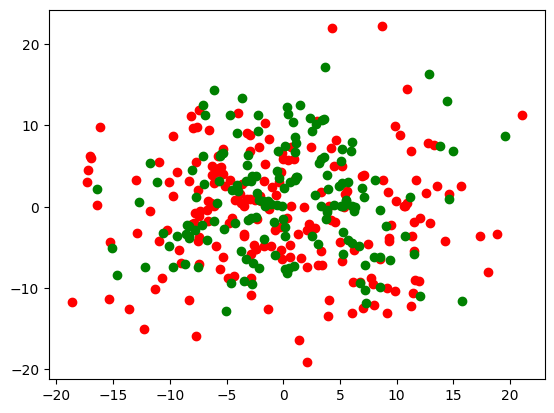

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(111)


plt.scatter(principalComponents_dog[:c1,0],principalComponents_dog[:c1,1],c='r')
plt.scatter(principalComponents_dog[c1:,0],principalComponents_dog[c1:,1],c='g')
plt.show()



Quesiton: 
No the two classes are not seperable with just 2 principal components. As both class points are all over the graph overlapping with each other